<a href="https://colab.research.google.com/github/Bee-Ene/Real-Estate-Price-Prediction/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REAL ESTATE PRICE PREDICTION.**

Regression analysis was used for this; Linear regression, Decision tree regression and Support vector regression.

In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATASET**

The dataset used for this project was gotten from kaggle. The dataset contains details of transaction date, house age, distance to nearest MRT station, number of covinenince stores, latitude, longitude and house price of unit area.

In [ ]:
#taking a look at the dataset
est_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Recommendation/data/Real estate.csv')

est_data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
#a look at the shape
est_data.shape

(414, 8)

In [ ]:
#checking the correlation of Y with the other columns
est_data.corr()['Y house price of unit area']

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

In [ ]:
#dropping column No, as it is of no use
est_data.drop(['No'],axis=1,inplace=True)

In [ ]:
#checking for missing values
print(f'Missing values in the dataset: {est_data.isnull().sum()}')

Missing values in the dataset: X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


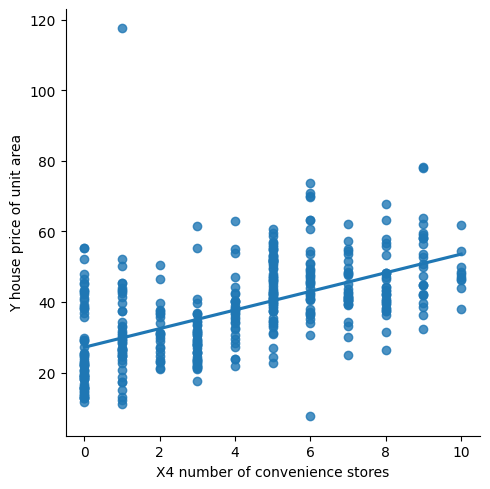

In [ ]:
#vizualization: fit regression line, convience store X house price
sns.lmplot(x='X4 number of convenience stores',y='Y house price of unit area',data=est_data,fit_reg=True, ci=None)

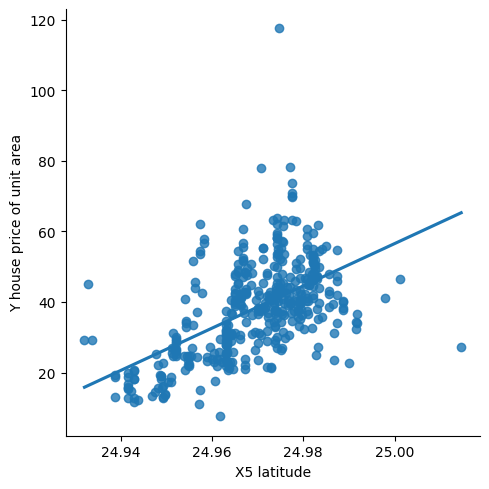

In [ ]:
#vizualization: fit regression line, latitude X house price
sns.lmplot(x='X5 latitude',y='Y house price of unit area',data=est_data,fit_reg=True, ci=None)

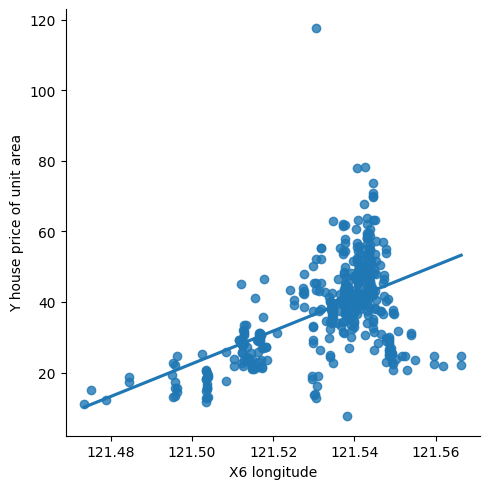

In [ ]:
#vizualization: fit regression line, longitude X house price
sns.lmplot(x='X6 longitude',y='Y house price of unit area',data=est_data,fit_reg=True, ci=None)

In [ ]:
#importing sklearn train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the dataset into train and test sets
X = est_data.drop('Y house price of unit area', axis =1)
Y = est_data['Y house price of unit area']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, Y_train.shape

((331, 6), (331,))

In [ ]:
X_test.shape, Y_test.shape

((83, 6), (83,))

In [ ]:
#importing our model and accuracy metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#linear regression
model_LR =LinearRegression()
model_LR.fit(X_train_scaled,Y_train)
Y_pred = model_LR.predict(X_test_scaled)

In [ ]:
#error metric
mae = mean_absolute_error(Y_test, Y_pred)
print(mae)

5.760226029972717


In [ ]:
#mean_absolute_percentage_error and r2 score
from sklearn.metrics import mean_absolute_percentage_error, r2_score
print(mean_absolute_percentage_error(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

0.16968352913507717
0.6573242742217802


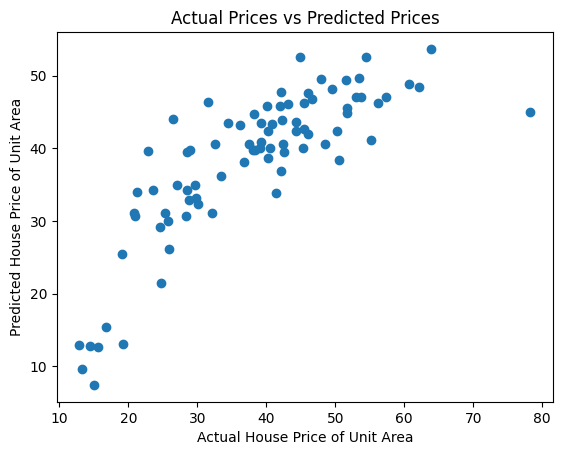

In [ ]:
#plotting Y_pred X Y_test
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
#using decision trees
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train_scaled, Y_train)
Y_pred = model_DTR.predict(X_test_scaled)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.18841586928365706


In [ ]:
#Support Vector Regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model_SVR = SVR(kernel='rbf')
model_SVR.fit(X_train_scaled, Y_train)


SVR()

In [ ]:
Y_pred = model_SVR.predict(X_test)
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.34617670150786467
